In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from equadratures import *

In [2]:
def fun(x):
    return np.exp(x[0] + x[1])

In [28]:
s = Parameter(distribution='uniform', lower=-1., upper=1., order=30)
mybasis = Basis('hyperbolic-basis', q=0.5)
#mypoly = Poly(parameters=[s,s], basis=mybasis,method='numerical-integration')
mypoly = Poly(parameters=[s,s], basis=mybasis, 
              method='least-squares', 
              sampling_args={'mesh': 'tensor-grid', 
                             'subsampling-algorithm': 'qr',
                              'sampling-ratio': 1.0})

In [29]:
mypoly.set_model(fun)

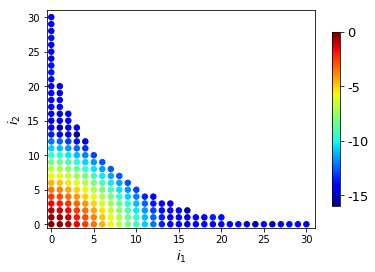

In [30]:
x, y, z, max_order =  vector_to_2D_grid(mypoly.get_coefficients(), mypoly.basis.get_elements()  )
G = np.log10(np.abs(z))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = plt.scatter(x, y, s=30, marker='o', c=G, cmap='jet', alpha=1.0, vmin=-16.0, vmax=0.)
plt.xlim(-0.5, max_order)
plt.ylim(-0.5, max_order)
ax.set_axisbelow(True)
plt.xlabel('$i_1$', fontsize=13)
plt.ylabel('$i_2$', fontsize=13)
cbar = plt.colorbar(extend='neither', spacing='proportional',
        orientation='vertical', shrink=0.8, format="%.0f")
cbar.ax.tick_params(labelsize=13)
plt.show()

In [27]:
print(mypoly.get_points().shape)

(120, 2)
